In [1]:
# Imported necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Recaptured Steps
df = pd.read_csv("/Users/miguel/HaaS/Capstone/baseball.csv")
df['WP'] = (df['W'] / df['G']).round(3)
df['RD'] =  df['RS'] - df['RA']
df['Label'] = (df['WP'] > 0.5).astype(int)
df['PWP'] =  ((df['RS']**2) / ((df['RS']**2) + (df['RA']**2))).round(3)
df['PW'] = (df['PWP'] * df['G']).round(1)

# Filter the data for Oakland A's from 2002 to 2012
oakland_2002_2012 = df[(df['Team'] == 'OAK') & (df['Year'] >= 2002) & (df['Year'] <= 2012)]

In [2]:
# Defined features and target
X = df[['PW']]  # Features (Predicted Wins)
y = df['W']     # Target (Actual Wins)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Training the models
knn_model = KNeighborsRegressor().fit(X_train, y_train)
linear_regression_model = LinearRegression().fit(X_train, y_train)
naive_bayes_model = GaussianNB().fit(X_train, y_train)
decision_tree_model = DecisionTreeRegressor().fit(X_train, y_train)
svm_model = SVR().fit(X_train, y_train)
mlp_model = MLPRegressor().fit(X_train, y_train)

In [4]:
# Prepared the data for predictions
X_oakland_2002_2012 = oakland_2002_2012[['PW']]  # Include other relevant features if necessary

In [5]:
# Predictions using each trained model
oakland_2002_2012_predictions = {
    'Year': oakland_2002_2012['Year'].values,
    'Actual Wins': oakland_2002_2012['W'].values
}

for model_name, model in zip(['KNN', 'Linear Regression', 'Naive Bayes', 'Decision Tree', 'SVM', 'MLP'], 
                             [knn_model, linear_regression_model, naive_bayes_model, decision_tree_model, svm_model, mlp_model]):
    y_pred_oakland_2002_2012 = model.predict(X_oakland_2002_2012)
    oakland_2002_2012_predictions[model_name] = y_pred_oakland_2002_2012

In [6]:
# Convert predictions to DataFrame for easy plotting
oakland_2002_2012_predictions_df = pd.DataFrame(oakland_2002_2012_predictions)

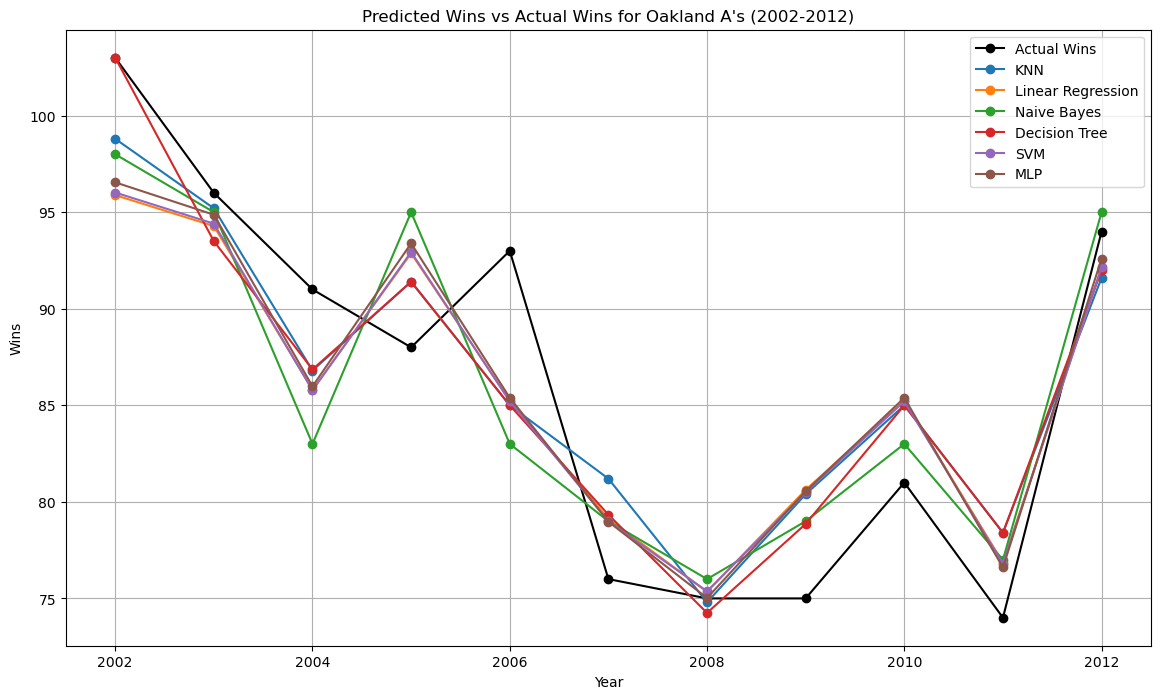

<Figure size 640x480 with 0 Axes>

In [7]:
# Plotting the predictions vs actual wins
plt.figure(figsize=(14, 8))

# Plot actual wins
plt.plot(oakland_2002_2012_predictions_df['Year'], oakland_2002_2012_predictions_df['Actual Wins'], marker='o', label='Actual Wins', color='black')

# Plot predictions for each model
for model_name in ['KNN', 'Linear Regression', 'Naive Bayes', 'Decision Tree', 'SVM', 'MLP']:
    plt.plot(oakland_2002_2012_predictions_df['Year'], oakland_2002_2012_predictions_df[model_name], marker='o', label=model_name)

plt.xlabel('Year')
plt.ylabel('Wins')
plt.title('Predicted Wins vs Actual Wins for Oakland A\'s (2002-2012)')
plt.legend()
plt.grid(True)
plt.show()

#Saveimage
plt.savefig('Wins.png')

/Users/miguel/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


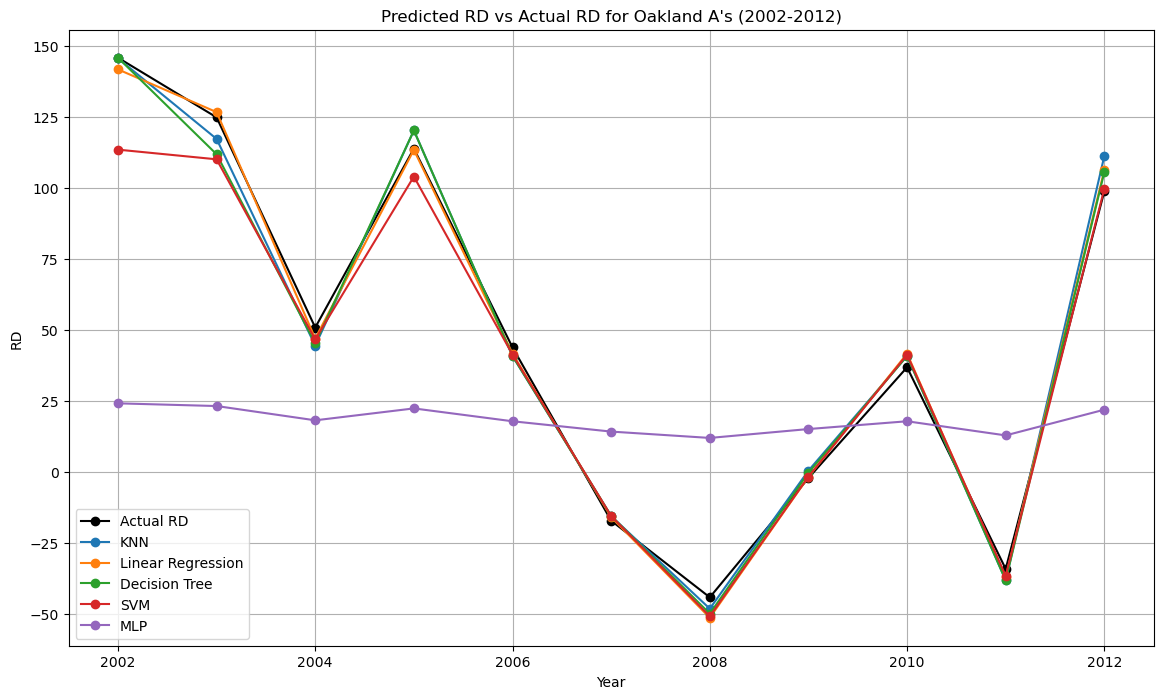

<Figure size 640x480 with 0 Axes>

In [20]:
#Recreating the chart above but for RD vs. Year
df['RD'] = df['RS'] - df['RA']

# Filter the data for Oakland A's from 2002 to 2012
oakland_2002_2012 = df[(df['Team'] == 'OAK') & (df['Year'] >= 2002) & (df['Year'] <= 2012)]

# Defined features and target
X = df[['PW']]
y = df['RD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the datasets like the code above
knn_model = KNeighborsRegressor().fit(X_train, y_train)
linear_regression_model = LinearRegression().fit(X_train, y_train)
decision_tree_model = DecisionTreeRegressor().fit(X_train, y_train)
svm_model = SVR().fit(X_train, y_train)
mlp_model = MLPRegressor().fit(X_train, y_train)

# Prepare the data for prediction
X_oakland_2002_2012 = oakland_2002_2012[['PW']]  # Include other relevant features if necessary

# Predicted using each trained model
oakland_2002_2012_predictions = {
    'Year': oakland_2002_2012['Year'].values,
    'Actual RD': oakland_2002_2012['RD'].values
}

for model_name, model in zip(['KNN', 'Linear Regression', 'Decision Tree', 'SVM', 'MLP'], 
                             [knn_model, linear_regression_model, decision_tree_model, svm_model, mlp_model]):
    y_pred_oakland_2002_2012 = model.predict(X_oakland_2002_2012)
    oakland_2002_2012_predictions[model_name] = y_pred_oakland_2002_2012

# Convert predictions to DataFrame for easy plotting
oakland_2002_2012_predictions_df = pd.DataFrame(oakland_2002_2012_predictions)

# Plotting the predictions vs actual RD
plt.figure(figsize=(14, 8))

# Plot actual RD
plt.plot(oakland_2002_2012_predictions_df['Year'], oakland_2002_2012_predictions_df['Actual RD'], marker='o', label='Actual RD', color='black')

# Plot predictions for each model
for model_name in ['KNN', 'Linear Regression', 'Decision Tree', 'SVM', 'MLP']:
    plt.plot(oakland_2002_2012_predictions_df['Year'], oakland_2002_2012_predictions_df[model_name], marker='o', label=model_name)

plt.xlabel('Year')
plt.ylabel('RD')
plt.title('Predicted RD vs Actual RD for Oakland A\'s (2002-2012)')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('RD.png')